<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Проверка-расчета-эффективности-обогащения" data-toc-modified-id="Проверка-расчета-эффективности-обогащения-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Проверка расчета эффективности обогащения</a></span></li><li><span><a href="#Анализ-признаков,-недоступных-в-тестовой-выборке" data-toc-modified-id="Анализ-признаков,-недоступных-в-тестовой-выборке-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Анализ признаков, недоступных в тестовой выборке</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Концентрация-металлов-на-различных-этапах-очистки" data-toc-modified-id="Концентрация-металлов-на-различных-этапах-очистки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Концентрация металлов на различных этапах очистки</a></span></li><li><span><a href="#Распределения-размеров-гранул-сырья" data-toc-modified-id="Распределения-размеров-гранул-сырья-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Распределения размеров гранул сырья</a></span></li><li><span><a href="#Суммарная-концентрация-всех-веществ-на-разных-стадиях" data-toc-modified-id="Суммарная-концентрация-всех-веществ-на-разных-стадиях-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Суммарная концентрация всех веществ на разных стадиях</a></span></li><li><span><a href="#Удаление-выбросов" data-toc-modified-id="Удаление-выбросов-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Удаление выбросов</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Функция-для-вычисления-итоговой-sMAPE" data-toc-modified-id="Функция-для-вычисления-итоговой-sMAPE-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Функция для вычисления итоговой sMAPE</a></span></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучение моделей</a></span></li><li><span><a href="#Проверка-на-тестовой-выборке" data-toc-modified-id="Проверка-на-тестовой-выборке-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Проверка на тестовой выборке</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

## Подготовка данных

Начнем исследование с общего обзора данных. Для этого сразу импортируем всё, что необходимо для исследования. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_val_predict
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error as MAE, make_scorer
from numpy.random import RandomState

Прочитаем файлы. Т.к. проект выполняется локально, а не на платформе, используем конструкцию try-except, чтобы избежать ошибки: 

In [2]:
try:
    data_train = pd.read_csv('C:/Users/freak/Desktop/Python/Сборный проект 2/gold_recovery_train_new.csv')
    data_test = pd.read_csv('C:/Users/freak/Desktop/Python/Сборный проект 2/gold_recovery_test_new.csv')
    data_full = pd.read_csv('C:/Users/freak/Desktop/Python/Сборный проект 2/gold_recovery_full_new.csv')
except: 
    data_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
    data_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
    data_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')

Ознакомимся с форматом таблиц: 

In [3]:
for data in [data_train, data_test, data_full]:
    display(data.head())

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


### Проверка расчета эффективности обогащения

Проверим, что эффективность обогащения рассчитана правильно. Вычислим её на обучающей выборке для признака `rougher.output.recovery`. Затем найдём MAE между нашими расчётами и значением признака. 

**Формула расчета эффективности обогащения:**

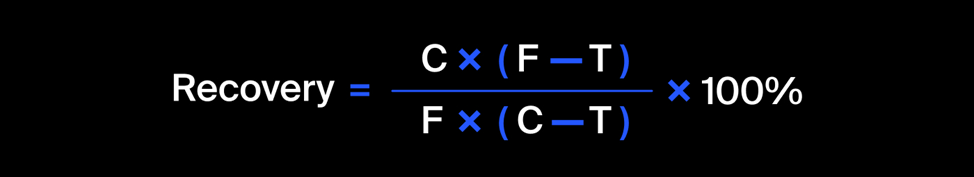

где:

•	C — доля золота в концентрате после флотации/очистки;

•	F — доля золота в сырье/концентрате до флотации/очистки;

•	T — доля золота в отвальных хвостах после флотации/очистки.

Для прогноза коэффициента нужно найти долю золота в концентратах и хвостах. Причём важен не только финальный продукт, но и черновой концентрат.


Превратим формулу в функцию: 

In [4]:
def recovery_calc(C, F, T):
    recovery = 100*((C*(F-T))/(F*(C-T)))
    return recovery

На данном этапе избавимся от пропусков в столбцах, чтобы сделать возможным расчет МАЕ: 

In [5]:
data_train_upd = data_train[['rougher.output.concentrate_au',  
                             'rougher.input.feed_au', 'rougher.output.tail_au', 
                             'rougher.output.recovery']].dropna(axis = 0)

Добавим в таблицу с обучающей выборкой столбец `recovery_checkup` (_англ._ "проверка обогащения") и отобразим в нем результат работы функции `recovery_calc`:

In [6]:
data_train_upd['recovery_checkup'] = recovery_calc(C = data_train_upd['rougher.output.concentrate_au'],
                                                      F = data_train_upd['rougher.input.feed_au'],
                                                      T = data_train_upd['rougher.output.tail_au'])

In [7]:
data_train_upd.head()

,rougher.output.concentrate_au,rougher.input.feed_au,rougher.output.tail_au,rougher.output.recovery,recovery_checkup
0,19.793808,6.486150,1.170244,87.107763,87.107763
1,20.050975,6.478583,1.184827,86.843261,86.843261
2,19.737170,6.362222,1.162562,86.842308,86.842308
3,19.320810,6.118189,1.079755,87.226430,87.226430
4,19.216101,5.663707,1.012642,86.688794,86.688794


Обратим внимание на столбцы `rougher.output.recovery` и `recovery_checkup`. Значения в них полностью совпадают. Значит, эффективность обогащения рассчитана правильно.

Найдём MAE между нашими расчётами и значением признака:

In [8]:
MAE(data_train_upd['rougher.output.recovery'], data_train_upd['recovery_checkup'])

9.73512347450521e-15

**Вывод: эффективность обогащения рассчитана правильно.** 

### Анализ признаков, недоступных в тестовой выборке

Проанализируем признаки, недоступные в тестовой выборке. Выясним, что это за параметры и к какому типу они относятся. 

In [9]:
[col for col in list(data_train.columns) if (col not in list(data_test.columns))]

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

В тестовой выборке для каждого этапа флотации отсутствуют параметры продукта: концентраты, отвальные хвосты, данные по эффективности обогащения. Также можно заметить отсутствие информации о соотношении сульфатов и свинца к золоту. В описании исследования сказано: _Некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей._ Именно это мы и наблюдаем выше. 

### Предобработка данных 

Проверим количество пропусков в таблицах и подумаем, что можно с ними сделать: 

In [10]:
for data in [data_train, data_test, data_full]:
    print('Кол-во пропусков в таблице:', data.isna().sum().sum())

Кол-во пропусков в таблице: 4100
Кол-во пропусков в таблице: 90
Кол-во пропусков в таблице: 4481


В техническом задании сказано: _Данные индексируются датой и временем получения информации (признак date). Соседние по времени параметры часто похожи._ Значит, есть смысл заполнить пропуски предыдущими/последующими по времени значениями. Предварительно изменим формат даты, затем заполним пропуски и убедимся в том, что всё прошло успешно. 

In [11]:
for data in [data_train, data_test, data_full]:
    data['date'] = pd.to_datetime(data['date'])

In [12]:
data_train = data_train.fillna(method='ffill')
data_test = data_test.fillna(method='ffill')
data_full = data_full.fillna(method='ffill')

In [13]:
for data in [data_train, data_test, data_full]:
    print('Кол-во пропусков в таблице:', data.isna().sum().sum())

Кол-во пропусков в таблице: 0
Кол-во пропусков в таблице: 0
Кол-во пропусков в таблице: 0


Пропуски заполнены. Проверим данные на наличие явных дубликатов: 

In [14]:
for data in [data_train, data_test, data_full]:
    print('Кол-во дубликатов:', data.duplicated().sum())

Кол-во дубликатов: 0
Кол-во дубликатов: 0
Кол-во дубликатов: 0


Дубликатов нет. На этом предобработку данных можно считать законченной. 

**Выводы:**

В первом пункте нашего исследования мы ознакомились с таблицами и логикой наименования столбцов. Также был проверен расчет эффективности обогащения, результат положительный — расчет сделан верно. Рассмотрены признаки, отсутствующие в тестовой выборке. В процессе предобработки данных был изменен формат даты, заполнены пропуски, сделана проверка на явные дубликаты. 

## Анализ данных

### Концентрация металлов на различных этапах очистки

Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. 

**Концентрация металлов перед флотацией:**

In [15]:
print('Концентрация золота(Au):{: 0.2f}, серебра(Ag):{: 0.2f}, свинца(Pb):{: 0.2f}'.
        format(data_full['rougher.input.feed_au'].mean(),
        data_full['rougher.input.feed_ag'].mean(),
        data_full['rougher.input.feed_pb'].mean()))

Концентрация золота(Au): 8.27, серебра(Ag): 8.79, свинца(Pb): 3.59


**Концентрация металлов после флотации:**

In [16]:
print('Концентрация золота(Au):{: 0.2f}, серебра(Ag):{: 0.2f}, свинца(Pb):{: 0.2f}'.
        format(data_full['rougher.output.concentrate_au'].mean(),
        data_full['rougher.output.concentrate_ag'].mean(),
        data_full['rougher.output.concentrate_pb'].mean()))

Концентрация золота(Au): 19.77, серебра(Ag): 11.99, свинца(Pb): 7.61


**Концентрация металлов после первичной очистки:**

In [17]:
print('Концентрация золота(Au):{: 0.2f}, серебра(Ag):{: 0.2f}, свинца(Pb):{: 0.2f}'.
        format(data_full['primary_cleaner.output.concentrate_au'].mean(),
        data_full['primary_cleaner.output.concentrate_ag'].mean(),
        data_full['primary_cleaner.output.concentrate_pb'].mean()))

Концентрация золота(Au): 32.12, серебра(Ag): 8.44, свинца(Pb): 9.81


**Концентрация металлов после вторичной очистки:**

In [18]:
print('Концентрация золота(Au):{: 0.2f}, серебра(Ag):{: 0.2f}, свинца(Pb):{: 0.2f}'.
        format(data_full['final.output.concentrate_au'].mean(),
        data_full['final.output.concentrate_ag'].mean(),
        data_full['final.output.concentrate_pb'].mean()))

Концентрация золота(Au): 44.08, серебра(Ag): 5.17, свинца(Pb): 9.98


Попробуем отобразить изменения концентрации на графике.

In [19]:
concentration = np.array([['rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au'],
                      ['rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag'],
                      ['rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb']]
                    )

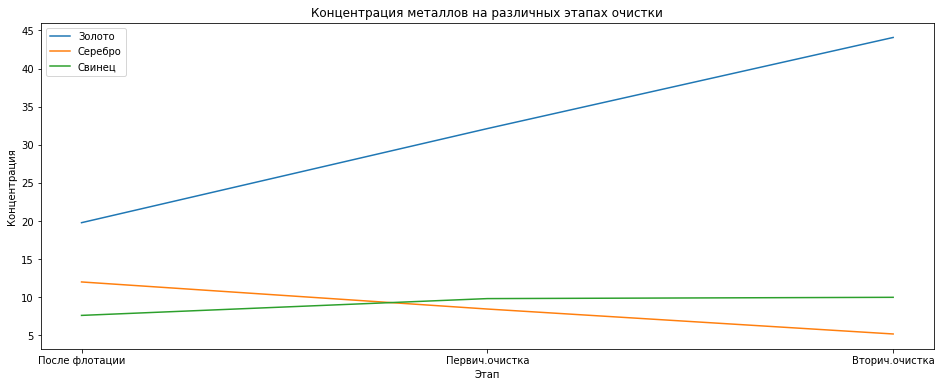

In [20]:
steps = ['После флотации', 'Первич.очистка', 'Вторич.очистка']
metals = ['Золото', 'Серебро', 'Свинец']

plt.subplots(1, 1, figsize=(16, 6))
plt.title('Концентрация металлов на различных этапах очистки')
plt.ylabel('Концентрация')
plt.xlabel('Этап')
for columns, met in zip(concentration, metals):
    sns.lineplot(data = pd.Series(data_full[columns].mean().values, index=steps), legend = True, label = met)


График отражает то, что уже можно было заметить: в процессе прохождения разных этапов очистки концентрация золота постепенно увеличивается, концентрация серебра падает, а концентрация свинца незначительно увеличивается. 

### Распределения размеров гранул сырья

Сравним распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

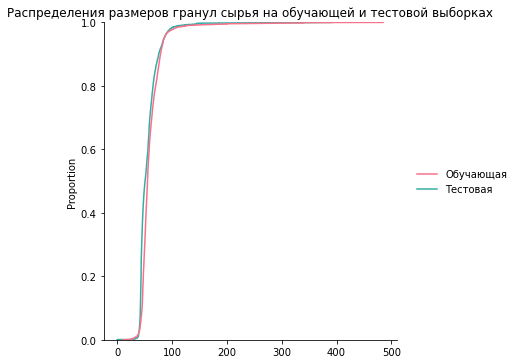

In [21]:
feed_sizes = pd.concat([data_train['rougher.input.feed_size'], data_test['rougher.input.feed_size']], axis = 1)
feed_sizes.columns = ['Обучающая', 'Тестовая']
sns.displot(feed_sizes, kind = 'ecdf', palette='husl')
plt.title('Распределения размеров гранул сырья на обучающей и тестовой выборках')
plt.show()

Обе линии идут вплотную друг к другу, а в некоторых местах полностью совпадают. Можно сделать вывод, что распределение размеров гранул практически не отличается. 

### Суммарная концентрация всех веществ на разных стадиях

Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

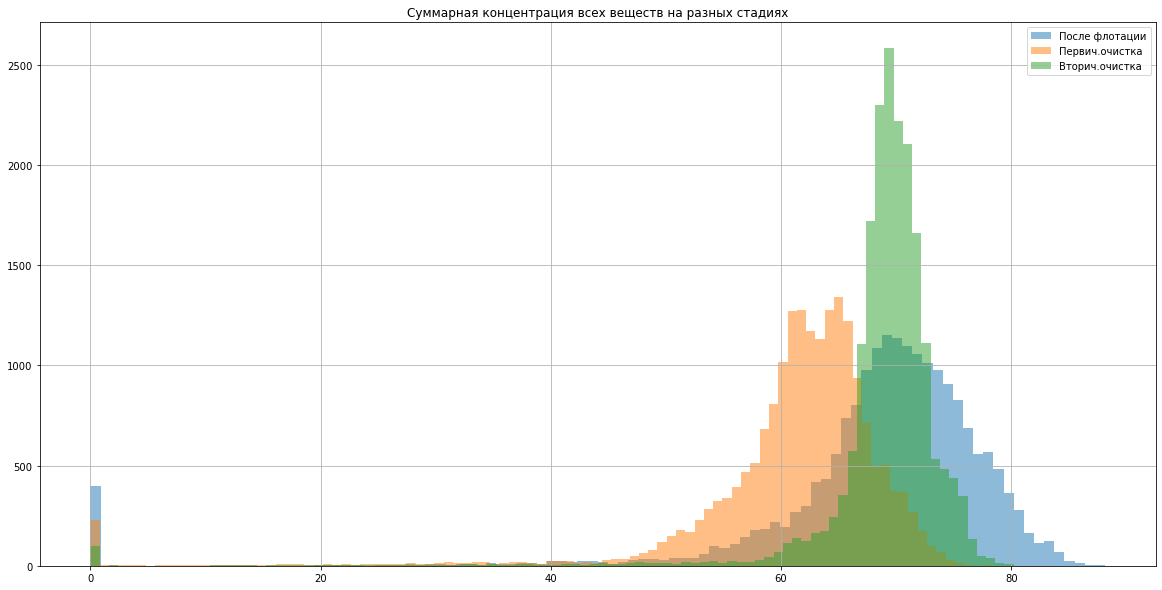

In [22]:
total_concentrates = {'rougher':[i for i in data_full.columns if i.startswith('rougher.output.concentrate')],
               'primary_cleaner':[i for i in data_full.columns if i.startswith('primary_cleaner.output.concentrate')],
               'final':[i for i in data_full.columns if i.startswith('final.output.concentrate')]}
for index in total_concentrates:
    np.sum(data_full[total_concentrates[index]], axis=1).hist(bins = 100, alpha = 0.5, figsize=(20, 10))
plt.title('Суммарная концентрация всех веществ на разных стадиях')
plt.legend(['После флотации', 'Первич.очистка', 'Вторич.очистка'])
plt.show()   

По аналогии с предыдущими пунктами, на этой гистограмме видно, что суммарная концентрация веществ возрастает по мере прохождения этапов очистки. Стоит обратить внимание на пиковые значения возле нуля. Они харакретны для всех этапов. Можно предположить, что в технологическом процессе есть моменты, когда концентрат по какой-то причине полностью отсутствует.

### Удаление выбросов

In [23]:
good_data_test = data_test.drop(index = data_test[data_test['rougher.input.feed_au'] < 30].index, axis = 0)
good_data_test = data_test.drop(index = data_test[data_test['rougher.input.feed_ag'] < 30].index, axis = 0)
good_data_test = data_test.drop(index = data_test[data_test['rougher.input.feed_pb'] < 30].index, axis = 0)
good_data_test = data_test.drop(index = data_test[data_test['rougher.input.feed_sol'] < 30].index, axis = 0)

In [24]:
good_data_train = data_train.drop(index = data_train[data_train['rougher.input.feed_au'] < 30].index, axis = 0)
good_data_train = data_train.drop(index = data_train[data_train['rougher.input.feed_ag'] < 30].index, axis = 0)
good_data_train = data_train.drop(index = data_train[data_train['rougher.input.feed_pb'] < 30].index, axis = 0)
good_data_train = data_train.drop(index = data_train[data_train['rougher.input.feed_sol'] < 30].index, axis = 0)

In [25]:
good_data_full = data_full.drop(index = data_full[data_full['rougher.input.feed_au'] < 30].index, axis = 0)
good_data_full = data_full.drop(index = data_full[data_full['rougher.input.feed_ag'] < 30].index, axis = 0)
good_data_full = data_full.drop(index = data_full[data_full['rougher.input.feed_pb'] < 30].index, axis = 0)
good_data_full = data_full.drop(index = data_full[data_full['rougher.input.feed_sol'] < 30].index, axis = 0)

## Модель

### Функция для вычисления итоговой sMAPE

**sMAPE** — (англ.) Symmetric Mean Absolute Percentage Error, «симметричное среднее абсолютное процентное отклонение»

Метрика sMAPE вычисляется так:
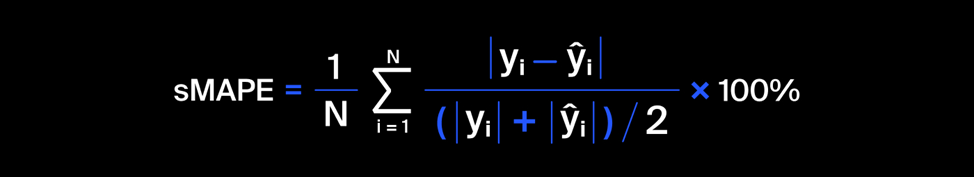

Итоговая метрика складывается из двух величин:
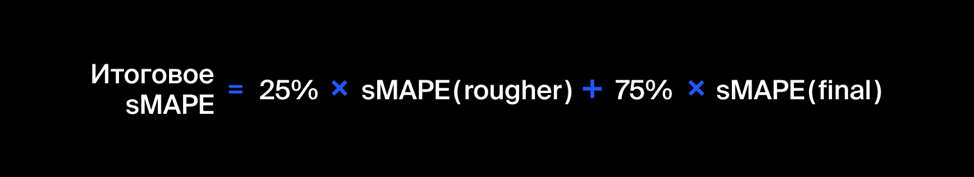

Напишем функции для расчета метрики: 

In [26]:
def smape(true, predict):
    return 1 / len(true) * sum( abs(true - predict) / ( (abs(true) + abs(predict)) * 0.5) ) * 100

In [27]:
def final_smape(smape_rougher, smape_final):
    return 0.25 * smape_rougher + 0.75 * smape_final

### Обучение моделей 

In [28]:
good_data_train = good_data_train.drop(index = good_data_train[good_data_train['rougher.output.recovery'] < 1].index, axis = 0)
good_data_train = good_data_train.drop(index = good_data_train[good_data_train['final.output.recovery'] < 1].index, axis = 0)

In [29]:
good_data_train_ = good_data_train.drop(['date', 'final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.tail_sol',
 'rougher.output.tail_au',
 'secondary_cleaner.output.tail_ag',
 'secondary_cleaner.output.tail_pb',
 'secondary_cleaner.output.tail_sol',
 'secondary_cleaner.output.tail_au'], axis=1) 

Выделим признаки и целевой признак: 

In [30]:
features_rougher = good_data_train_.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)

In [31]:
target_rougher = good_data_train_['rougher.output.recovery']

In [32]:
print(features_rougher.shape)
print(target_rougher.shape)

(12589, 52)
(12589,)


In [33]:
state = np.random.RandomState(123)

**Линейная регрессия на тренировочной выборке**

_Для этапа флотации:_

In [34]:
lin_reg_rougher = LinearRegression()

lin_reg_rougher_smape = cross_val_score(lin_reg_rougher, features_rougher, target_rougher, 
                             scoring = make_scorer(smape), cv = 5, n_jobs = -1).mean()

print('sMAPE для этапа флотации:', round((lin_reg_rougher_smape),2))

sMAPE для этапа флотации: 7.24


_Для финального этапа:_

In [35]:
features_final = good_data_train_.drop(['final.output.recovery', 'rougher.output.recovery'], axis='columns')

In [36]:
target_final = good_data_train_['final.output.recovery']

In [37]:
print(features_final.shape)
print(target_final.shape)

(12589, 52)
(12589,)


In [38]:
lin_reg_final = LinearRegression()

lin_reg_final_smape = cross_val_score(lin_reg_final, features_final, target_final, 
                             scoring = make_scorer(smape), cv = 5, n_jobs = -1).mean()

print('sMAPE для финального этапа:', round((lin_reg_final_smape),2))

sMAPE для финального этапа: 10.73


In [39]:
print('Final sMAPE:', round(final_smape(lin_reg_rougher_smape, lin_reg_final_smape), 2))

Final sMAPE: 9.86


**Случайный лес на тренировочной выборке**

_Подбор гиперпараметров_

In [40]:
rfr=RandomForestRegressor(random_state=state)
param_grid = { 
    'n_estimators': [1, 5],
    'max_depth' : [3, 6] }
CV_rfr = GridSearchCV(estimator=rfr, param_grid=param_grid, scoring=make_scorer(smape), cv= 5)
CV_rfr.fit(features_rougher, target_rougher)

print('Лучшие гиперпараметры:', CV_rfr.best_params_)


Лучшие гиперпараметры: {'max_depth': 6, 'n_estimators': 1}


_Для этапа флотации:_

In [41]:
model = RandomForestRegressor(max_depth=6, n_estimators=1, random_state=state)
smape_value_rougher = cross_val_score(model, features_rougher, target_rougher, 
                                scoring = make_scorer(smape), cv = 5, n_jobs = -1).mean()
print('sMAPE для этапа флотации:', round((smape_value_rougher), 2))

sMAPE для этапа флотации: 8.05


_Для финального этапа:_

In [42]:
model = RandomForestRegressor(max_depth=6, n_estimators=1, random_state=state)
smape_value_final = cross_val_score(model, features_final, target_final, 
                                scoring = make_scorer(smape), cv = 5, n_jobs = -1).mean()
print('sMAPE для финального этапа:', round((smape_value_final), 2))

sMAPE для финального этапа: 10.81


In [43]:
print('Final sMAPE:', round(final_smape(smape_value_rougher, smape_value_final), 2))

Final sMAPE: 10.12


In [44]:
#цикл для этапа флотации
for depth in range(3, 6):
    model = RandomForestRegressor(random_state=state, max_depth=depth) 

    model.fit(features_rougher, target_rougher)
    predictions = model.predict(features_rougher)
    smape_value_rougher = cross_val_score(model, features_rougher, target_rougher, 
                                scoring = make_scorer(smape), cv = 5, n_jobs = -1).mean()
    smape_value_final = cross_val_score(model, features_final, target_final, 
                                scoring = make_scorer(smape), cv = 5, n_jobs = -1).mean()
    print("max_depth =", depth, ": ", end='')
    print(final_smape(smape_value_rougher, smape_value_final))


max_depth = 3 : 8.503490677641814
max_depth = 4 : 8.443052683727359
max_depth = 5 : 8.49093655933528


### Проверка на тестовой выборке

Линейная регресия показала лучший результат Final sMAPE. Будем использовать эту модель для работы с тестовой выборкой. 

Добавим в тестовую выборку недостающие признаки: 

In [45]:
good_data_full_merge = good_data_full[['date', 'rougher.output.recovery', 'final.output.recovery']]
good_data_test = good_data_test.merge(good_data_full_merge, on='date', how='left')

In [46]:
good_data_test = good_data_test.drop(index = good_data_test[good_data_test['rougher.output.recovery'] < 1].index, axis = 0)
good_data_test = good_data_test.drop(index = good_data_test[good_data_test['final.output.recovery'] < 1].index, axis = 0)

Удалим столбец с датой, т.к. он не нужен для обучения моделей. 

In [47]:
good_data_test_ = good_data_test.drop(['date'], axis=1)

Выделим признаки и целевой признак:

In [48]:
features_test_rougher = np.array(good_data_test_.drop(['rougher.output.recovery', 'final.output.recovery'], axis='columns'))

In [49]:
target_test_rougher = np.array(good_data_test_['rougher.output.recovery'])

In [50]:
print(features_test_rougher.shape)
print(target_test_rougher.shape)

(4785, 52)
(4785,)


**Линейная регрессия на тестовой выборке**

_Для этапа флотации:_

In [51]:
model = LinearRegression()
model.fit(features_test_rougher, target_test_rougher)
predictions_test_rougher = model.predict(features_test_rougher)
print('sMAPE для тестовых данных на этапе флотации:', round(smape(target_test_rougher, predictions_test_rougher),2))

sMAPE для тестовых данных на этапе флотации: 2.64


_Для финального этапа:_

In [52]:
features_test_final = np.array(good_data_test_.drop(['final.output.recovery', 'rougher.output.recovery'], axis='columns'))

In [53]:
target_test_final = np.array(good_data_test_['final.output.recovery'])

In [54]:
print(features_test_final.shape)
print(target_test_final.shape)

(4785, 52)
(4785,)


In [55]:
model = LinearRegression()
model.fit(features_test_final, target_test_final)
predictions_test_final = model.predict(features_test_final)
print('sMAPE для тестовых данных на финальном этапе:', round(smape(target_test_final, predictions_test_final),2))

sMAPE для тестовых данных на финальном этапе: 5.99


In [56]:
print('Final sMAPE для тестовых данных:', round(final_smape(smape(target_test_rougher, predictions_test_rougher), 
                                  smape(target_test_final, predictions_test_final)),2))

Final sMAPE для тестовых данных: 5.15


**КОНСТАНТНАЯ  МОДЕЛЬ**

In [59]:
constant_model = DummyRegressor()
constant_model_final = DummyRegressor()
constant_model.fit(features_rougher, target_rougher)
constant_model_final.fit(features_final,target_final)

constant_model_rougher = constant_model.predict(good_data_test_)
constant_model_final_pred = constant_model_final.predict(good_data_test_)

In [60]:
print(final_smape(smape(target_test_rougher, constant_model_rougher),smape(target_test_final, constant_model_final_pred)))

7.067329881801754


## Выводы

Наилучшей моделью можно назвать модель Линейную регрессию со следующими результатами на тестовой выборке: 
    
- sMAPE для этапа флотации: 2.64
- sMAPE для финального этапа: 5.99
- Final sMAPE: 5.15